# Exportando um relatório em pdf do preço de criptomoedas utilizando python

## Bibliotecas necessárias

Para fazer este projeto, foram utilizadas as seguintes bibliotecas do Python,

In [1]:
# libs de análise e manipulação dos dados
import pandas as pd
import numpy as np
import pandas_datareader.data as web

# libs de visualização dos dados e análises gráficas
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# lib para aquisição dos dados financeiros
import yfinance as yf
yf.pdr_override()   # função necessária para correta importação dos dados

## Importando os dados utilizando API Yahoo Finance

Para baixar os dados necessários do Bitcoin da API yfinance, é necessário definir alguns parâmetros. 

Primeiro, passar qual o "símbolo" da ação em questão. No caso, como o objetivo é analisar o variação do preço dos bitcoins em dólar, utiliza-se o código em formato de texto str 'BTC-USD'.

Segundo, necessário passar o período do tempo em que se deseja acessar tais dados. Isto pode ser feito de duas formas, passando as datas de início e fim da análise, ou informando o período em q se deseja analisar (dias, meses ou anos). Neste projeto, utilizou-se os dados referentes a 6 meses.

In [2]:
# Definindo o símbolo da ação de interesse
simbolo = 'BTC-USD'

# definindo o período de tempo
periodo = '6mo'

Agora os dados podem ser coletados conforme segue abaixo,

In [3]:
dados = web.get_data_yahoo(simbolo, period = periodo)

[*********************100%%**********************]  1 of 1 completed


Exibindo as primeiras 5 linhas do dataset importado,

In [4]:
dados.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-08,28450.457031,28663.271484,27310.134766,27694.273438,27694.273438,19122903752
2023-05-09,27695.068359,27821.400391,27375.601562,27658.775391,27658.775391,14128593256
2023-05-10,27654.636719,28322.687500,26883.669922,27621.755859,27621.755859,20656025026
2023-05-11,27621.085938,27621.941406,26781.826172,27000.789062,27000.789062,16724343943
2023-05-12,26987.662109,27055.646484,25878.429688,26804.990234,26804.990234,19313599897


Acessando as estatísticas descritivas por coluna,

In [5]:
dados.describe()

,Open,High,Low,Close,Adj Close,Volume
count,185.000000,185.000000,185.000000,185.000000,185.000000,1.850000e+02
mean,28458.823459,28855.923342,28109.675834,28497.634692,28497.634692,1.391695e+10
std,2469.389398,2560.485913,2460.378677,2524.445371,2524.445371,5.782328e+09
min,25121.673828,25735.308594,24797.167969,25124.675781,25124.675781,5.331173e+09
25%,26564.056641,26888.882812,26240.701172,26567.632812,26567.632812,1.044652e+10
50%,27654.636719,28047.238281,27215.552734,27658.775391,27658.775391,1.282699e+10
75%,29907.998047,30233.656250,29664.121094,29912.281250,29912.281250,1.583738e+10
max,35441.578125,35919.843750,35159.812500,35652.761719,35652.761719,4.493500e+10


Mais informações do dataset,

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 185 entries, 2023-05-08 to 2023-11-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       185 non-null    float64
 1   High       185 non-null    float64
 2   Low        185 non-null    float64
 3   Close      185 non-null    float64
 4   Adj Close  185 non-null    float64
 5   Volume     185 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 10.1 KB


## Média móvel

A fim de se visualizar os preços de fechamento do bitcoin ao longo de todo o período avaliado, plotou-se o gráfico abaixo. 

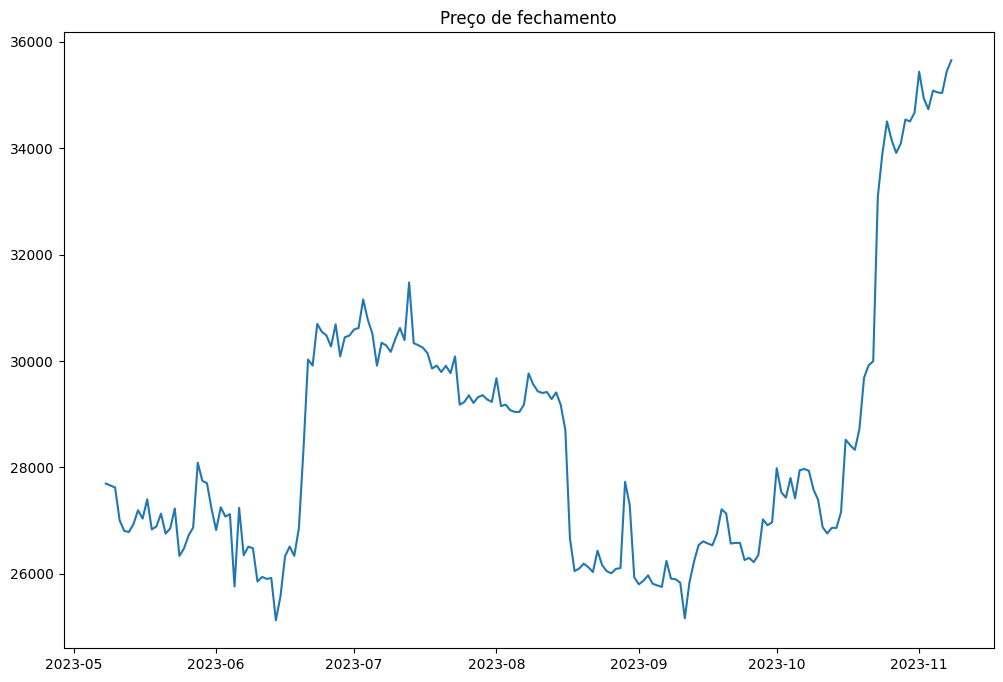

In [7]:
plt.figure(figsize=(12,8))
plt.plot(dados['Close'])
plt.title('Preço de fechamento');

É muito comum em gráficos de variação de preços, ou até mesmo em gráficos de varejo, observar um comportamento oscilante dos dados ao longo do tempo. Para se avaliar melhor quais são as tendências dos dados, utiliza-se um gráfico plotando-se as médias móveis dos dados. Basicamente, a média móvel vai "amenizar" estes picos, suavizando a curva e permitindo melhores insights a partir das análises.

Para fazer o cálculo da média móvel a respeito dos dados de fechamento do preço dos bitcoins, utilizou-se da função rolling( ), que permite calcular estatísticas em janelas predefinidas.

Calculando-se então as médias móveis, considerando uma janela de 5 dias,

In [8]:
window = 5
dados['Close'].rolling(window = window).mean()

Date
2023-05-08             NaN
2023-05-09             NaN
2023-05-10             NaN
2023-05-11             NaN
2023-05-12    27356.116797
                  ...     
2023-11-04    34971.559375
2023-11-05    35047.874219
2023-11-06    34967.897656
2023-11-07    35068.961719
2023-11-08    35253.049219
Name: Close, Length: 185, dtype: float64

Desta forma, plotou-se o gráfico de linhas abaixo, com os dados do preço de fechamento e os dados da média móvel considerando 5 dias e 25 dias.

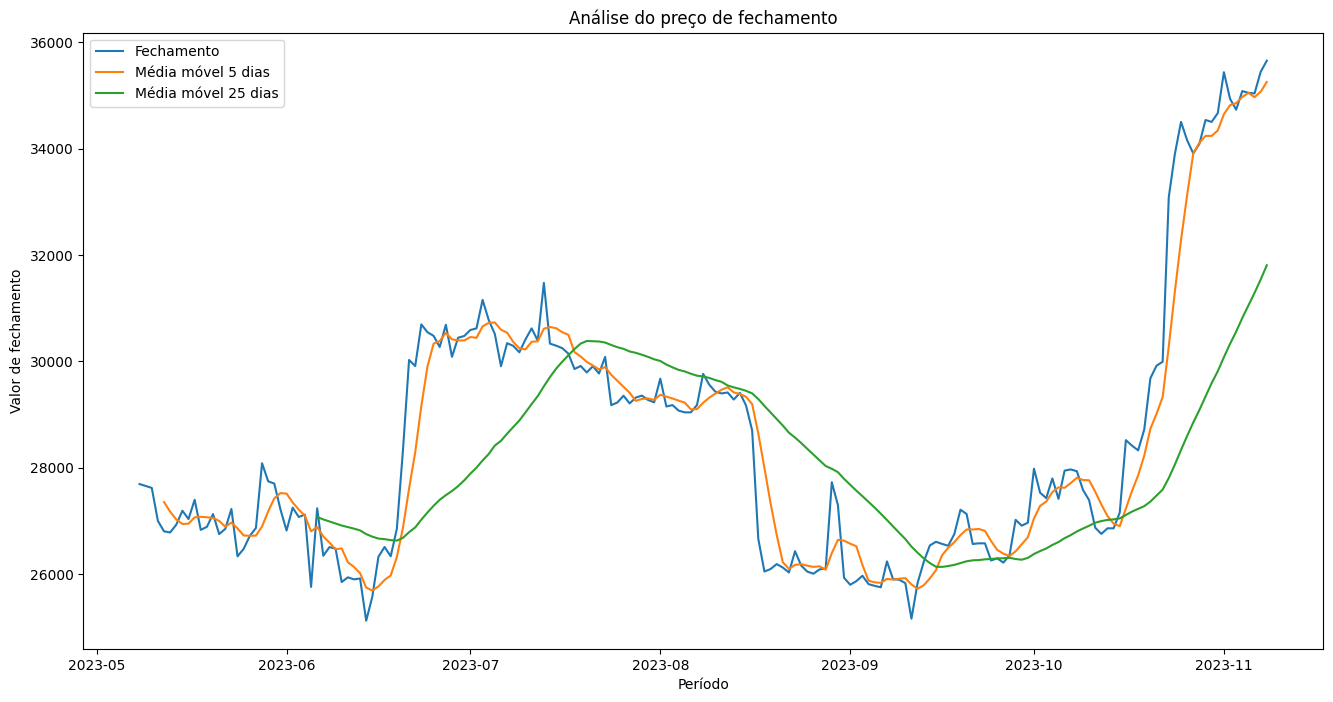

In [10]:
# ajustando o tamanho do gráfico
plt.figure(figsize = (16, 8))

# definindo a janela para as médias móveis
janela = 5

# plots
plt.plot(dados['Close'])                                        # preço de fechamento
plt.plot(dados['Close'].rolling(window = janela).mean())        # média móvel de 5 dias
plt.plot(dados['Close'].rolling(window = janela + 25).mean())   # média móvel de 25 dias

# definindo a legenda para cada uma das curvas do gráfico
plt.legend(['Fechamento', 'Média móvel 5 dias', 'Média móvel 25 dias'])

# definindo o título do gráfico e os nomes dos eixos
plt.ylabel('Valor de fechamento')
plt.xlabel('Período')
plt.title('Análise do preço de fechamento')

plt.show()

## Gráficos utilizando Plotly

Antes de plotar os gráficos utilizando a biblioteca Plotly, criou-se uma nova coluna no dataset "Media_movel" com os dados de média móvel dos preços de fechamento, considerando uma janela de 5 dias.

In [11]:
janela = 5

dados['Media_movel'] = dados['Close'].rolling(window = janela).mean()

In [12]:
# visualizando o dataset com a nova coluna adicionada
dados.head()

,Open,High,Low,Close,Adj Close,Volume,Media_movel
Date,,,,,,,
2023-05-08,28450.457031,28663.271484,27310.134766,27694.273438,27694.273438,19122903752,NaN
2023-05-09,27695.068359,27821.400391,27375.601562,27658.775391,27658.775391,14128593256,NaN
2023-05-10,27654.636719,28322.687500,26883.669922,27621.755859,27621.755859,20656025026,NaN
2023-05-11,27621.085938,27621.941406,26781.826172,27000.789062,27000.789062,16724343943,NaN
2023-05-12,26987.662109,27055.646484,25878.429688,26804.990234,26804.990234,19313599897,27356.116797


### Gráficos de fechamento

Plotou-se o mesmo gráfico de fechamento das médias móveis, porém utilizando o Plotly.

In [13]:
# utilizando o ploty.express (px)
px.line(
    data_frame = dados,
    x = dados.index,
    y = ['Close', 'Media_movel'],
    title = 'Análise de fechamento'
)

In [14]:
# utilizando o plotly.graph_objects (go)

# criando o gráfico dos preços de fechamento
fig = go.Figure(
    data = go.Scatter(
        x = dados.index,
        y = dados['Close'],
        name = 'Fechamento'
    )
)

# adicionando no gráfico de fechamento a linha com os dados das médias móveis de fechamento
fig.add_trace(
    go.Scatter(
        x = dados.index,
        y = dados['Media_movel'],
        name = 'Média movel'
    )
)

# editando o título do gráfico e os eixos
fig.update_layout(
    title = 'Análise de fechamento',
    xaxis_title = 'Período',
    yaxis_title = 'Preço de fechamento'
)

# exibindo o gráfico
fig.show()

### Gráfico Candlestick

Além dos gráficos de fechamento acima, um gráfico muito comum no mundo financeiro chamado "Candlestick" Este tipo de gráfico permite avaliar a dispersão entre os valores de abertura e fechamento de bolsas de valores, além do comparativo entre o maior e menor preço atingido por determinada ação em alguma data em específico. Por padrão, as velas crescentes são desenhadas em verde, enquanto que as decrescentes são representadas em vermelho.

Segue abaixo um exemplo de gráfico candlestick com Plotly, utilizando os dados de abertura, fechamento, high e low do bitcoin.

In [15]:
# criando o gráfico clandestick
candlestick = go.Figure(
    data = go.Candlestick(
        x = dados.index,
        open = dados['Open'],
        high = dados['High'],
        low = dados['Low'],
        close = dados['Close'],
    )
)

# editando os eixos do gráfico
candlestick.update_layout(
    title = 'Gráfico Candlestick de preços do bitcoin',
    xaxis_title = 'Período',
    yaxis_title = 'Preço de fechamento'
)

# exibindo o gráfico
candlestick.show()

## Relatório final

Neste relatório final, foi criado um dashboard utilizando os gráficos em plotly, tanto candlestick mostrando a oscilação da cotação do bitcoin ao longo dos 6 meses, quanto o gráfico de fechamento com as médias móveis.

Para tal, utilizou-se da função make_subplots( ) da biblioteca Plotly, onde por meio desta é possível fazer mais de um gráfico no mesmo objeto, definindo-se o número de linhas e colunas necessárias, os títulos e etc.



### Construção do relatório

In [16]:
# definindo como será o relatório
relatorio = make_subplots(
    rows = 2,                                       # definindo o número de linhas do relatório
    cols = 1,                                       # definindo o número de colunas do relatório
    specs = [
        [{'type':'scatter'}],
        [{'type':'scatter'}],
    ],
    subplot_titles = ('Cotação', 'Fechamento'),     # definindo o título de cada gráfico
    shared_xaxes = True,                            # argumento para que ambos os gráficos compartilhem o mesmo eixo x
    vertical_spacing = 0.08                         # definindo a distância vertical entre os gráficos
)

# ajuste do Layout
relatorio.update_layout(
    width = 1000, height = 800,                                         # definindo a dimensão
    title_text = '<b>Cotação do Bitcoin<b>',                            # título do relatório
    template = 'plotly_dark',                                           # definindo o estilo
    paper_bgcolor = 'rgb(0, 0, 0)', plot_bgcolor = 'rgb(10, 10, 10)',   # ajuste de layout gráficos
    font = dict(color = 'white', size = 16)                             # ajustando a cor do título e o tamanho da fonte
)

# definindo o gráfico candlestick na primeira linha do relatório
relatorio.add_trace(
    go.Candlestick(
        x = dados.index,
        open = dados['Open'],
        high = dados['High'],
        low = dados['Low'],
        close = dados['Close']
    ), 
    row = 1, col = 1            # ajustando a posição do gráfico no relatório
)

# retirando a barra visivel
relatorio.update_layout(
    xaxis_rangeslider_visible=False
)

# definindo o gráfico dos preços de fechamento na segunda linha do relatório
relatorio.add_trace(
    go.Scatter(
        x = dados.index,
        y = dados['Close'],
        name = 'Fechamento',
        line = dict(color = 'green')    # definindo a cor da linha do gráfico
    ),
    row = 2, col = 1                    # ajustando a posição do gráfico no relatório
)

# adicionando no gráfico de fechamento definido acima, a linha com os dados das médias móveis de fechamento
relatorio.add_trace(
    go.Scatter(
        x = dados.index,
        y = dados['Media_movel'],
        mode = 'lines',
        name = 'Média Móvel',
        line = dict(color = 'rgb(158, 58, 171)')    # definindo a cor da linha do gráfico
    ),
    row = 2, col = 1                                # é a mesma posição do gráfico acima, justamente para ambos
)                                                   # pertencerem ao mesmo gráfico

# ajuste da posição da legenda
relatorio.update_layout(
    legend = dict(
        orientation = 'h',
        yanchor = 'bottom',
        y = 1.02,
        xanchor = 'right',
        x = 1,
        font = dict(size = 9)
    )
)

# exibindo o relatório
relatorio.show()

### Exportando em pdf

Por último, para exportar o relatório criado acima em um arquivo pdf, utilizou-se a função write_image( ), passando o nome do arquivo e o formato dele, conforme demonstrado abaixo.

In [17]:
relatorio.write_image('Report_Financeiro.pdf')